In [11]:
!pip install nltk
!pip install emoji
!pip install umap
!pip install plotly
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scikit-learn
!pip install xgboost
!pip install langdetect
!pip install optuna
!pip install spacy


import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score, make_scorer
)
import optuna
import emoji
import re
import scipy.sparse
import spacy
from langdetect import detect

import os

# Création d'un répertoire local au cas où les chemins par défaut posent problème
nltk_data_dir = os.path.join(os.getcwd(), "nltk_data")
os.makedirs(nltk_data_dir, exist_ok=True)

# Ajout manuel au chemin
nltk.data.path.append(nltk_data_dir)

# Téléchargements des ressources nécessaires dans le bon répertoire
nltk.download("punkt", download_dir=nltk_data_dir)
nltk.download("stopwords", download_dir=nltk_data_dir)
nltk.download("wordnet", download_dir=nltk_data_dir)


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run succe

[nltk_data] Downloading package punkt to /Users/salhinina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salhinina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/salhinina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/salhinina/Desktop/Mach
[nltk_data]     ine_learning/Projet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/salhinina/Desktop/
[nltk_data]     Machine_learning/Projet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/salhinina/Desktop/Ma
[nltk_data]     chine_learning/Projet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df=pd.read_csv('scitweets_export.tsv', sep='\t')
display (df.head())
print("Nombre total de lignes :", len(df))

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


Nombre total de lignes : 1140


In [13]:
#-------------------------------
#----Analyse du jeu de données – 
#------------------------------

In [14]:
df_sci = df[df["science_related"] == 1]
print("Nombre de lignes scientifiques :", len(df_sci))

Nombre de lignes scientifiques : 375


In [15]:
# 36 28 35 %
context_only = df_sci[(df_sci["scientific_context"] == 1.0)]
claim_only = df_sci[(df_sci["scientific_claim"] == 1.0)]
ref_only = df_sci[(df_sci["scientific_reference"] == 1.0)]

nb_total = df_sci[(df_sci["scientific_claim"] == 1.0) |
                   (df_sci["scientific_reference"] == 1.0) |
                   (df_sci["scientific_context"] == 1.0)]["tweet_id"].count()
print("\nOccurrences parmi les scientifiques :")
print("- CLAIM uniquement:", len(claim_only))
print("- CONTEXT uniquement :", len(context_only))
print("- Ref uniquement :", len(ref_only))

print("Nombre de tweets TOTAL : ",len(claim_only)+ len(context_only)+ len(ref_only))
print(f"Nombre total de tweets ayant au moins une catégorie : {nb_total}")


Occurrences parmi les scientifiques :
- CLAIM uniquement: 263
- CONTEXT uniquement : 251
- Ref uniquement : 203
Nombre de tweets TOTAL :  717
Nombre total de tweets ayant au moins une catégorie : 375


In [16]:
# Repartir de df_sci filtré (science_related == 1)
df_sci = df[df["science_related"] == 1].copy()

# Créer les 3 groupes (peu importe les chevauchements)
claim_only = df_sci[df_sci["scientific_claim"] == 1.0].copy()
claim_only["label_text"] = "CLAIM"

context_only = df_sci[df_sci["scientific_context"] == 1.0].copy()
context_only["label_text"] = "CONTEXT"

ref_only = df_sci[df_sci["scientific_reference"] == 1.0].copy()
ref_only["label_text"] = "REF"

# Concaténer les 3 groupes sans éliminer les doublons
df_multi = pd.concat([claim_only, context_only, ref_only], ignore_index=True)

# Encodage : CLAIM=0, CONTEXT=1, REF=2
label_map = {"CLAIM": 0, "CONTEXT": 1, "REF": 2}
df_multi["label"] = df_multi["label_text"].map(label_map)

# Vérification finale
print("\n Répartition finale des classes (avec chevauchements autorisés) :")
print(df_multi["label_text"].value_counts())
print("\n Mapping utilisé :", label_map)



 Répartition finale des classes (avec chevauchements autorisés) :
label_text
CLAIM      263
CONTEXT    251
REF        203
Name: count, dtype: int64

 Mapping utilisé : {'CLAIM': 0, 'CONTEXT': 1, 'REF': 2}


In [17]:
#----------------------------------
#---distribution des classes--------
#----------------------------------

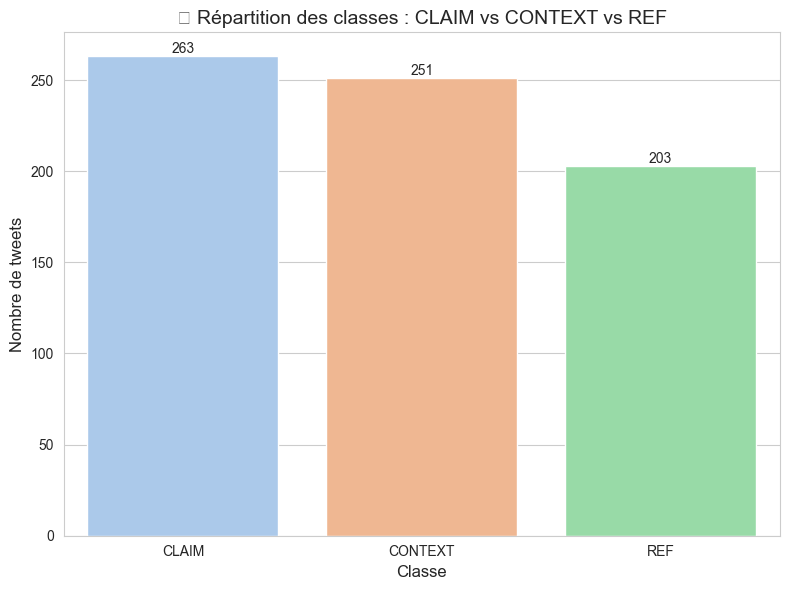

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Comptage des classes
counts = df_multi["label_text"].value_counts().reset_index()
counts.columns = ["Classe", "Nombre"]

# Barplot avec seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
bar = sns.barplot(data=counts, x="Classe", y="Nombre", palette="pastel")

# Titre et axes
plt.title("📊 Répartition des classes : CLAIM vs CONTEXT vs REF", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre de tweets", fontsize=12)

# Affichage des valeurs sur les barres
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
#-------------------------------
#----Nettoyage + normalisation du texte--------
#------------------------------

In [20]:
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convertir les emojis en texte (tweet_text)
def convert_emojis(text):
    return emoji.demojize(str(text))

df_multi['tweet_text'] = df_multi['text'].apply(convert_emojis)

# 2. Détection des éléments textuels
df_multi['has_url'] = df_multi['text'].str.contains(r'http[s]?://', regex=True)
df_multi['has_mention'] = df_multi['text'].str.contains(r'@\w+', regex=True)
df_multi['has_hashtag'] = df_multi['text'].str.contains(r'#\w+', regex=True)
df_multi['has_emoji'] = df_multi['tweet_text'].str.contains(r':[^:\s]+:', regex=True)

# 3. Fonction pour compter par classe (label_text)
def count_by_category(col):
    return df_multi.groupby('label_text')[col].sum()

# 4. Affichage des statistiques
print("- Tweets avec URL :")
display(count_by_category('has_url'))

print("- Tweets avec Mention :")
display(count_by_category('has_mention'))

print("- Tweets avec Hashtag :")
display(count_by_category('has_hashtag'))

print("- Tweets avec Emoji :")
display(count_by_category('has_emoji'))


- Tweets avec URL :


label_text
CLAIM      197
CONTEXT    236
REF        199
Name: has_url, dtype: int64

- Tweets avec Mention :


label_text
CLAIM      57
CONTEXT    73
REF        50
Name: has_mention, dtype: int64

- Tweets avec Hashtag :


label_text
CLAIM      76
CONTEXT    84
REF        65
Name: has_hashtag, dtype: int64

- Tweets avec Emoji :


label_text
CLAIM      5
CONTEXT    2
REF        2
Name: has_emoji, dtype: int64

In [21]:
#------------------------------------------------------------
#--------matrice tf-idf avce les données brut---------------
#-------------------------------------------------------------

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

# Étape 1 : Supprimer les lignes sans texte
df_multi.dropna(subset=['tweet_text'], inplace=True)

# Étape 2 : Sélection du texte brut et du label multiclasses
X_text = df_multi['tweet_text']
y = df_multi['label']  # 0 = CLAIM, 1 = CONTEXT, 2 = REF

# Étape 3 : Création de la matrice TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X_text)

# Étape 4 : Création de la matrice des features binaires supplémentaires
extra_features = df_multi[['has_url', 'has_mention', 'has_hashtag', 'has_emoji']].astype(int)
X_extra = scipy.sparse.csr_matrix(extra_features.values)

# Étape 5 : Concaténation TF-IDF + features supplémentaires
X_final = scipy.sparse.hstack([X_tfidf, X_extra])

# Étape 6 : Affichage des dimensions
print("Taille de la matrice TF-IDF :", X_tfidf.shape)
print("Taille des features supplémentaires :", X_extra.shape)
print("Taille finale (TF-IDF + features) :", X_final.shape)


Taille de la matrice TF-IDF : (717, 3372)
Taille des features supplémentaires : (717, 4)
Taille finale (TF-IDF + features) : (717, 3376)


In [23]:
import re
import pandas as pd

# Convertir la matrice TF-IDF en DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Fonction de catégorisation des tokens
def get_token_category(token):
    if token.isdigit():
        return 'numeric'
    if re.match(r'^\d+(am|pm|s|h|min|sec|hour|years)?$', token.lower()):
        return 'timestamp'
    if re.match(r'^[a-zA-Z]+$', token):
        return 'valid'
    return 'other'

# Classer chaque token selon son type
token_categories = {token: get_token_category(token) for token in tfidf_df.columns}

# Séparer les colonnes par catégorie
valid_tokens = [token for token, cat in token_categories.items() if cat == 'valid']
numeric_tokens = [token for token, cat in token_categories.items() if cat == 'numeric']
timestamp_tokens = [token for token, cat in token_categories.items() if cat == 'timestamp']

# Colonnes synthétiques : total de valeurs numériques et timestamps par ligne
tfidf_df['numeric'] = tfidf_df[numeric_tokens].sum(axis=1) if numeric_tokens else 0
tfidf_df['timestamp'] = tfidf_df[timestamp_tokens].sum(axis=1) if timestamp_tokens else 0

# Conserver uniquement les tokens valides et les colonnes synthétiques
tfidf_cleaned = tfidf_df[valid_tokens + ['numeric', 'timestamp']]

# Aperçu
print("Aperçu de la matrice TF-IDF nettoyée :")
display(tfidf_cleaned.head())
print("Taille finale :", tfidf_cleaned.shape)


Aperçu de la matrice TF-IDF nettoyée :


,ability,able,abnormal,abortion,abortions,about,absolute,abstract,abuse,abuser,...,yrs,yvandutil,zachary,zheng,zhengli,zhu,zika,zjghyzrngd,numeric,timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Taille finale : (717, 2905)


In [24]:
#------------------------------------------------------------
#--------train et evaluation---------------
#-------------------------------------------------------------